In [12]:
from openai import OpenAI   # pylint: disable=import-error

In [ ]:
help(OpenAI)

In [16]:

import os
os.environ["OPENAI_API_KEY"] = "sk-proj-"

In [ ]:
import os
from openai import OpenAI


OPENAI_API_KEY = os.environ.get('OPENAI_API_KEY')


print("*" * 10 )
print(OPENAI_API_KEY)
print("*" * 10 )

# client = OpenAI(api_key=OPENAI_API_KEY)

# completion = client.chat.completions.create(
#   model="gpt-3.5-turbo",
# #   model="gpt-4o-mini",
#   messages=[
#     {"role": "system", "content": "You are a helpful assistant."},
#     {"role": "user", "content": "Tell me about Basque country"}
#   ]
# )

# print(completion.choices[0].message.content)


In [19]:
from openai import OpenAI
client = OpenAI(api_key=OPENAI_API_KEY)


file_upload_response = client.files.create(
  file=open("fine_tuning_data.jsonl", "rb"),
  purpose='fine-tune'
)

In [20]:
file_upload_response

FileObject(id='file-TiXjCyDTVYdC8st4g79mIqV8', bytes=1544122, created_at=1725944888, filename='fine_tuning_data.jsonl', object='file', purpose='fine-tune', status='processed', status_details=None)

In [21]:
file_upload_response_val = client.files.create(
  file=open("fine_tuning_data_val.jsonl", "rb"),
  purpose='fine-tune'
)

In [22]:
file_upload_response_val


FileObject(id='file-vb6zsRfz4dMkK1saykXmarbp', bytes=101509, created_at=1725944917, filename='fine_tuning_data_val.jsonl', object='file', purpose='fine-tune', status='processed', status_details=None)

In [23]:
fine_tuning_response = client.fine_tuning.jobs.create(training_file=file_upload_response.id,
                                                      model='gpt-3.5-turbo',
                                                      hyperparameters={'n_epochs':1},
                                                      validation_file=file_upload_response_val.id
                                                      )

In [24]:
fine_tuning_response

FineTuningJob(id='ftjob-al9QRF1nfMnm78Th4oZXaeBz', created_at=1725944940, error=Error(code=None, message=None, param=None), fine_tuned_model=None, finished_at=None, hyperparameters=Hyperparameters(n_epochs=1, batch_size='auto', learning_rate_multiplier='auto'), model='gpt-3.5-turbo-0125', object='fine_tuning.job', organization_id='org-wtAVMfb98ehqwFtmcI2MKaTE', result_files=[], seed=847789156, status='validating_files', trained_tokens=None, training_file='file-TiXjCyDTVYdC8st4g79mIqV8', validation_file='file-vb6zsRfz4dMkK1saykXmarbp', estimated_finish=None, integrations=[], user_provided_suffix=None)

In [31]:
client.fine_tuning.jobs.list(limit=1)

SyncCursorPage[FineTuningJob](data=[FineTuningJob(id='ftjob-al9QRF1nfMnm78Th4oZXaeBz', created_at=1725944940, error=Error(code=None, message=None, param=None), fine_tuned_model=None, finished_at=None, hyperparameters=Hyperparameters(n_epochs=1, batch_size=1, learning_rate_multiplier=2), model='gpt-3.5-turbo-0125', object='fine_tuning.job', organization_id='org-wtAVMfb98ehqwFtmcI2MKaTE', result_files=[], seed=847789156, status='running', trained_tokens=None, training_file='file-TiXjCyDTVYdC8st4g79mIqV8', validation_file='file-vb6zsRfz4dMkK1saykXmarbp', estimated_finish=1725946135, integrations=[], user_provided_suffix=None)], object='list', has_more=True)

In [26]:
train_event = client.fine_tuning.jobs.list_events(fine_tuning_job_id='ftjob-ZUoVxSBTZ32etom14iqCGw5L',
                                                  limit=500)

In [35]:
train_event.data[2].data

{'step': 500,
 'train_loss': 7.629394644936838e-07,
 'valid_loss': 9.5367431640625e-07,
 'total_steps': 500,
 'full_valid_loss': 0.43611229790581596,
 'train_mean_token_accuracy': 1.0,
 'valid_mean_token_accuracy': 1.0,
 'full_valid_mean_token_accuracy': 0.9407407407407408}

In [27]:
train_loss = []
val_loss = []

for item in train_event.data:
    train_data = item.data
    if train_data and 'valid_loss' in train_data:
        train_loss.insert(0,train_data['train_loss'])
        val_loss.insert(0,train_data['valid_loss'])

In [28]:
train_data['train_loss']

0.0036211013793945312

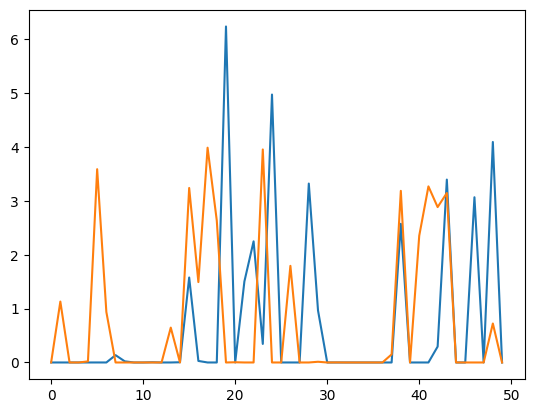

In [29]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(train_loss)
plt.plot(val_loss)




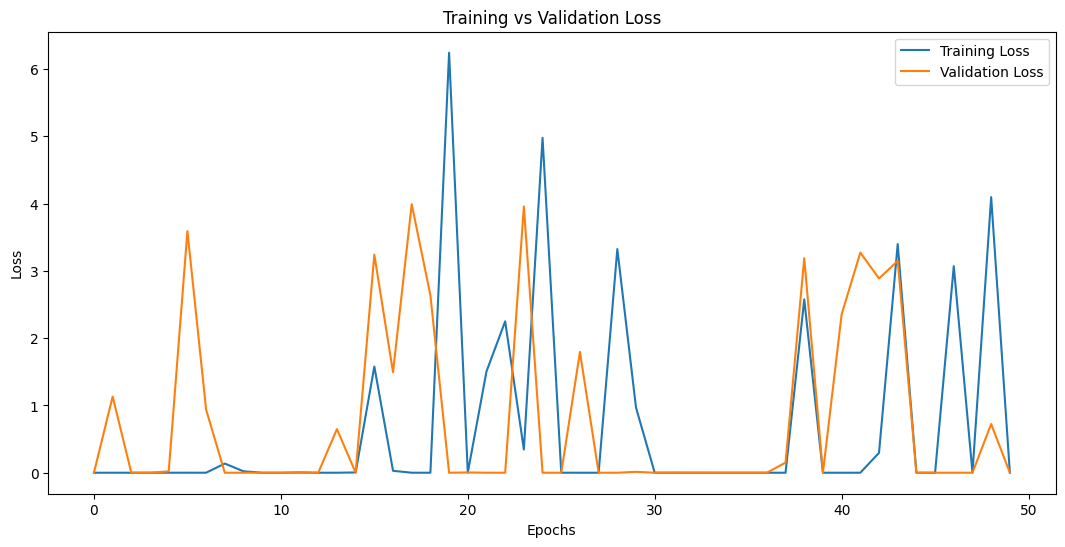

In [38]:
import matplotlib.pyplot as plt

# Create a figure and resize the plot
plt.figure(figsize=(13, 6))  # Resize to 10x6 inches

# Plot the training and validation loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')

# Add a title and labels
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Add a legend to display the colors and tags
plt.legend()

# Show the plot
plt.show()
